# Assignment-Support Vector Machine (Handwritten Digit Recognition)

# Data Understanding
Let's first understand the shape, attributes etc. of the dataset.

In [2]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale


In [3]:
# Importing the dataset
MNIST_train_data = pd.read_csv("C:/Users/anusha/Downloads/train.csv")

In [4]:
# about the dataset

# dimensions
print("Dimensions: ", MNIST_train_data.shape, "\n")

# data types
print(MNIST_train_data.info())

# head
MNIST_train_data.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#printing columns of dataset
print(MNIST_train_data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [6]:
#printing unique data in label field
digits= list(MNIST_train_data['label'].unique())
digits

[1, 0, 4, 7, 3, 5, 8, 9, 2, 6]

In [7]:
#Checking for column-wise null count
MNIST_train_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

No Null values present in the dataset

# Exploratory Data Analysis 

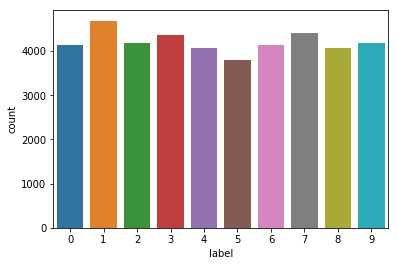

In [8]:
#check whether the training data-set is biased towards certain numbers or not by printing out the value_counts() and
#the distribution plot of labels.
sns.countplot(MNIST_train_data['label'])

In [9]:
#printing values count of unique data
print (MNIST_train_data['label'].value_counts())

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [12]:
# splitting into X and y
X = MNIST_train_data.drop("label", axis = 1)
y = MNIST_train_data['label']

In [13]:
# scaling the features
X_scaled = scale(X)

Since the training dataset is quite large (42,000 labelled images), it would take a lot of time for
training an SVM on the full MNIST data, so you can split ths data 20% for training and 80% for testing. 

In [14]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.8, random_state = 101)

In [15]:
X_train.shape

(8400, 784)

# Model Building
Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [16]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [17]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


The linear model gives approx. 91% accuracy.

Let's look at a sufficiently non-linear model using kernel 'poly'.

In [19]:
# using poly kernel, C=1, default value of gamma
# model
non_linear_poly_model = SVC(kernel='poly')

# fit
non_linear_poly_model.fit(X_train, y_train)

# predict
y_pred = non_linear_poly_model.predict(X_test)

In [20]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.87125 

[[2893    0    8    3   38   13   28    0  299    3]
 [   1 3684   11    1   12    0    6    0   43    2]
 [  14   18 2489   37  153    1   11   19  588   13]
 [   0   16   24 2846   27   36    3   13  464   46]
 [   3    8   15    0 3080    8    3    5   17  151]
 [   6    1    5   72   73 2358   30    7  442   45]
 [  16    9   10    0  108   43 2901    2  188    0]
 [   1   41    7    7  138    1    0 2862  105  342]
 [   2   16    6   30   20   40    1    4 3131   22]
 [   6   14    1   13  153    8    0   42   88 3030]]


 Non-linear model using kernel 'poly' gives 87% accuracy which is smaller as compare to linear model.

Lets try Non-linear model using rbf kernel.

In [21]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [22]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9396428571428571 

[[3195    0   19    5    4   11   32    4   14    1]
 [   0 3689   23   12    8    3    7    6    8    4]
 [  15   15 3144   29   31    5   18   37   43    6]
 [   5    8   92 3191    5   73    6   31   43   21]
 [   3    7   57    1 3099    9   19   21    7   67]
 [  15   10   37   66   16 2776   53   15   32   19]
 [  19    5   46    1   12   31 3149    2   12    0]
 [   6   21   66   11   25    3    0 3285    3   84]
 [  14   24   40   63   14   62   22   19 2996   18]
 [  12   10   38   40   80    6    0   97   24 3048]]


Non linear model with kernel  rbf gives appx 94% accuracy.

# Grid Search: Hyperparameter Tuning
Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [23]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 103.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [24]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,113.844513,2.029981,14.161128,0.103511,1,0.01,"{'C': 1, 'gamma': 0.01}",0.752381,0.750595,0.747024,...,0.741310,0.010784,12,1.000000,0.999851,0.999851,1.000000,1.000000,0.999940,0.000073
1,29.457998,1.251639,8.412419,0.492809,1,0.001,"{'C': 1, 'gamma': 0.001}",0.935119,0.926786,0.935119,...,0.930833,0.004216,4,0.972321,0.971429,0.971429,0.972173,0.973214,0.972113,0.000663
2,41.889620,1.187838,11.154349,0.445703,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.905952,0.907738,...,0.903095,0.006075,8,0.916518,0.917708,0.916518,0.921577,0.919940,0.918452,0.002001
3,115.988473,1.759919,14.395683,0.447279,10,0.01,"{'C': 10, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,24.344522,0.592566,7.374281,0.209757,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941071,0.938690,0.945833,...,0.939405,0.003865,1,0.999405,0.999554,0.999405,0.999107,0.999256,0.999345,0.000152
5,18.428693,0.408953,6.856468,0.130151,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.933929,0.923214,0.931548,...,0.927262,0.004678,5,0.957887,0.959970,0.959375,0.957738,0.959077,0.958810,0.000865
6,119.110210,2.277747,14.244294,0.227104,100,0.01,"{'C': 100, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,24.534988,0.895971,7.448082,0.242139,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939881,0.936905,0.946429,...,0.939286,0.003783,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,13.977916,0.518264,5.549149,0.066198,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929762,0.923810,0.925595,...,0.925595,0.003409,6,0.994345,0.994494,0.994940,0.993006,0.994196,0.994196,0.000645
9,116.065122,2.013522,14.347811,0.268823,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


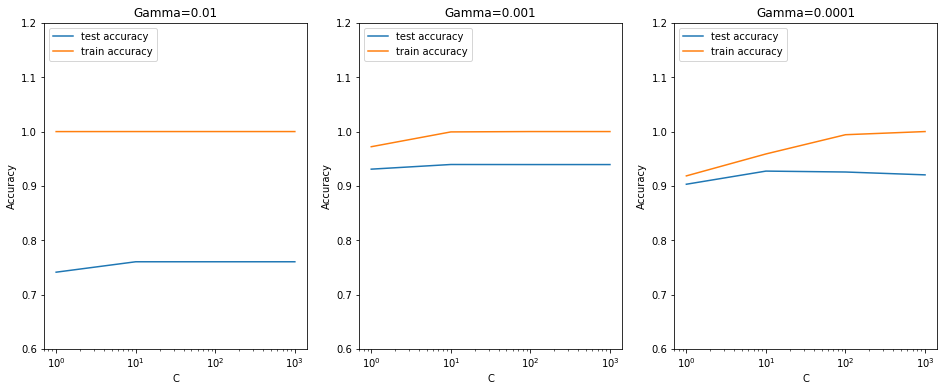

In [25]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.20])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.20])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.20])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

The plots above show some useful insights:

Non-linear models (high gamma) perform much better than the linear ones
At any value of gamma, a high value of C leads to better performance
None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other
This suggests that the problem and the data is inherently non-linear in nature, and a complex model will outperform simple, linear models in this case.

Let's now choose the best hyperparameters.

In [26]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9394047619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


# Building and Evaluating the Final Model
Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [28]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


accuracy 0.9477083333333334 

[[3211    0   19    2    2   12   26    3    8    2]
 [   0 3692   26    9    6    3    5    9    7    3]
 [  13   12 3165   29   29    6   20   40   21    8]
 [   4    5   77 3232    4   79    1   23   31   19]
 [   5    8   42    1 3117    5   20   19    9   64]
 [  15    8   33   61   15 2815   35   11   31   15]
 [  19    5   44    1   12   18 3167    1   10    0]
 [   5   17   52   12   29    4    1 3322    4   58]
 [   7   16   42   53   15   51   18   16 3044   10]
 [   9    9   33   20   81   10    0   94   21 3078]] 



we can see that appx 95% accuracy is obtained with non lineae model using rbf kernel.

let's check some of the predictions

In [35]:
print(y_pred[100:105])
print(y_test[100:105])

[2 6 7 9 1]
38319    2
27638    6
6440     7
33884    9
10432    1
Name: label, dtype: int64


Now we our going to predict using the test data provided by kaggle and see how well we do on this data. 

In [38]:
# Loading the test data
MNIST_test=pd.read_csv('C:/Users/anusha/Downloads/test.csv')

In [46]:
MNIST_test.shape

(28000, 784)

In [39]:
#looking at the features available in data and taking it as X_test
X_test=MNIST_test[MNIST_test.columns]

In [41]:
# scaling the features
X_test_scaled = scale(X_test)

In [47]:
#making predictions on the test data
modelfinal=model.predict(X_test_scaled)

In [44]:
#saving the results in the dataframe
df=pd.DataFrame(modelfinal,columns=['Label'],index=np.arange(1,28001))

In [45]:
# Saving the dataframe into a submission.csv file
df.to_csv('subimission.csv',index_label='ImageId')